# Instalación requisitos

In [32]:
!pip install statsmodels==0.12.2
!pip install skforecast
!pip install minisom
!pip install tslearn

# Librerías

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [35]:
import warnings
warnings.filterwarnings('ignore')

# Lectura dataset
Modificar path para cargar la carpeta donde se encuentre el conjunto de datos

In [36]:
water_consumptions = pd.read_csv('~/Modelar_UH2022.txt', sep="|")
water_consumptions.head(30)

,ID,SAMPLETIME,READINGINTEGER,READINGTHOUSANDTH,DELTAINTEGER,DELTATHOUSANDTH
0,0,2019-06-13 08:34:09,369320,0.0,17,0.0
1,0,2019-06-13 17:34:10,369403,0.0,2,0.0
2,0,2019-06-13 18:34:10,369403,0.0,0,0.0
3,0,2019-06-13 04:34:10,369284,0.0,1,0.0
4,0,2019-06-13 14:34:10,369356,0.0,28,0.0
5,0,2019-06-13 01:34:09,369283,0.0,0,0.0
6,0,2019-06-13 16:34:10,369401,0.0,42,0.0
7,0,2019-06-13 10:34:09,369323,0.0,0,0.0
8,0,2019-06-13 22:34:08,369511,0.0,15,0.0
9,0,2019-06-13 23:34:08,369552,0.0,41,0.0


# Retype, select and rename columns

In [37]:
water_consumptions['SAMPLETIME'] = water_consumptions['SAMPLETIME'].astype('datetime64[ns]')
select_columns = ['ID', 'SAMPLETIME', 'DELTAINTEGER']
water_consumptions = water_consumptions[select_columns]
water_consumptions.set_axis(['id', 'datetime', 'consumption'], axis=1, inplace=True)
water_consumptions

,id,datetime,consumption
0,0,2019-06-13 08:34:09,17
1,0,2019-06-13 17:34:10,2
2,0,2019-06-13 18:34:10,0
3,0,2019-06-13 04:34:10,1
4,0,2019-06-13 14:34:10,28
...,...,...,...
21404823,2749,2019-10-11 06:27:14,0
21404824,2756,2019-04-06 05:50:17,0
21404825,2756,2019-04-06 07:50:17,12
21404826,2756,2019-04-06 04:50:17,0


# Selección y transformación de las características

In [38]:
water_consumptions['datetime'] = water_consumptions.apply(lambda row: row.datetime.date(), axis=1)
water_consumptions

,id,datetime,consumption
0,0,2019-06-13,17
1,0,2019-06-13,2
2,0,2019-06-13,0
3,0,2019-06-13,1
4,0,2019-06-13,28
...,...,...,...
21404823,2749,2019-10-11,0
21404824,2756,2019-04-06,0
21404825,2756,2019-04-06,12
21404826,2756,2019-04-06,0


# Agrupación consumos por id y fecha


In [39]:
water_consumption_per_id_date = water_consumptions.groupby(['id','datetime']).sum().reset_index()
water_consumption_per_id_date

,id,datetime,consumption
0,0,2019-02-01,243
1,0,2019-02-02,236
2,0,2019-02-03,335
3,0,2019-02-04,252
4,0,2019-02-05,220
...,...,...,...
890832,2748,2019-08-03,313
890833,2748,2019-09-14,8
890834,2749,2019-08-06,0
890835,2749,2019-10-11,2


In [40]:
water_consumption_per_id_date.to_csv('water_consumption_id_date.csv', index=False)

Seleccionamos los ids de las series completas para la clusterización

In [41]:
id_length = water_consumption_per_id_date.groupby(['id']).size()
print('Number of series:', len(id_length))
complete_series_ids = id_length[id_length == 365]
print('Number of complete series: ', len(complete_series_ids))

Number of series: 2747
Number of complete series:  1975


In [42]:
complete_series_ids = complete_series_ids.reset_index()
complete_series_ids.head()

,id,0
0,0,365
1,1,365
2,2,365
3,3,365
4,4,365


Filtramos las series completas

In [43]:
complete_series_df = water_consumption_per_id_date[water_consumption_per_id_date['id'].isin(complete_series_ids['id'])]
complete_series_df

,id,datetime,consumption
0,0,2019-02-01,243
1,0,2019-02-02,236
2,0,2019-02-03,335
3,0,2019-02-04,252
4,0,2019-02-05,220
...,...,...,...
846742,2400,2020-01-27,80
846743,2400,2020-01-28,60
846744,2400,2020-01-29,72
846745,2400,2020-01-30,43


In [44]:
consumption_series = dict()

for id in set(complete_series_df['id']):
  id_df = complete_series_df[complete_series_df['id'] == id]
  date_consumption_df = id_df.loc[:,["datetime","consumption"]]
  date_consumption_df.set_index("datetime",inplace=True)
  date_consumption_df.sort_index(inplace=True)
  consumption_series[id] = date_consumption_df

# Preparación de los datos
Normalización series temporales

In [45]:
from sklearn.preprocessing import StandardScaler

for index in consumption_series:
    scaler = StandardScaler()
    consumption_series[index] = scaler.fit_transform(consumption_series[index])
    consumption_series[index] = consumption_series[index].reshape(len(consumption_series[index]))

In [46]:
consumption_series[1202]

array([ 6.32567769e-01,  2.46215912e-01,  2.70642167e-01,  5.30096652e-01,
        1.17233372e-01,  1.37489291e-01,  1.93788829e-01,  4.07667498e-01,
       -2.22500084e-01, -2.53777605e-01,  8.24552172e-01,  7.22676818e-01,
       -1.53093775e-01,  3.48687029e-01,  5.31889243e-02, -9.20286687e-01,
       -9.49181159e-01,  1.22744174e-01, -1.72604990e-01,  7.59768326e-02,
        1.20866298e-03,  1.94533532e-01, -4.10612032e-01, -4.07484280e-01,
        3.63283206e-01,  1.70851980e-01,  5.36203215e-01,  1.11602888e+00,
        1.75423925e+00, -2.28308766e-01,  1.98257046e-01,  1.12481638e+00,
        9.99706291e-01,  1.67098147e+00,  4.32689514e-01,  2.53216119e-01,
       -8.62050921e-01, -7.43792103e-01,  4.40583365e-01,  3.48687029e-01,
        3.38261189e-01,  4.20178506e-01,  4.52647552e-01, -7.30387451e-01,
       -4.68549917e-01, -7.20557373e-01, -6.91811842e-01,  3.51070078e-01,
        3.01026044e-01,  9.21959310e-01,  1.20212184e-01,  7.15086153e-02,
        1.90749911e+00,  

Eliminamos los ids para clusterizar

In [47]:
water_series_anonimized = list(consumption_series.values())
water_series_anonimized[0]

array([-3.72417048e-01, -4.37922043e-01,  4.88505743e-01, -2.88196340e-01,
       -5.87647745e-01, -6.36077857e-02, -5.42499293e-02, -8.40309869e-01,
       -1.94617776e-01,  3.01348615e-01, -5.50216320e-01,  5.07221456e-01,
       -5.97005602e-01, -1.75902063e-01,  9.47040708e-01, -3.55342164e-02,
        5.63368595e-01,  3.48137897e-01,  1.19034498e+00, -2.22691345e-01,
        2.82632902e-01,  9.18967139e-01, -5.68932033e-01,  6.75662872e-01,
        9.37682852e-01, -3.25627766e-01,  2.91990758e-01, -9.61962002e-01,
       -6.99942023e-01, -4.94069181e-01,  6.66305015e-01,  3.57495753e-01,
        3.38780040e-01,  1.89054338e-01, -3.72417048e-01, -1.38306554e+00,
       -1.57186350e-01,  1.31199711e+00,  2.45365559e+00, -5.87647745e-01,
       -6.90584166e-01,  1.80796350e+00,  3.85569323e-01,  2.99707785e-02,
       -5.40858463e-01, -6.43794884e-01,  1.15291355e+00,  1.12550657e-02,
        9.09609282e-01, -8.77741295e-01,  9.54757735e-02,  9.47040708e-01,
       -5.12784894e-01, -

# K-Means
Realizamos una clusterización mediante el algoritmo k-means clásico. El número de centros lo obtenemos de la fase de análisis de los datos.

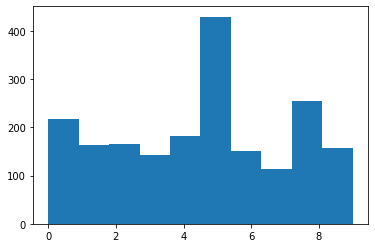

In [48]:
my_seed = 0
optimal_number_clusters = 10
kmeans = KMeans(n_clusters=optimal_number_clusters, random_state=my_seed)
kmeans.fit(water_series_anonimized)
cluster_labels = kmeans.labels_

y, x, _ = plt.hist(cluster_labels)

Mostramos los centroides

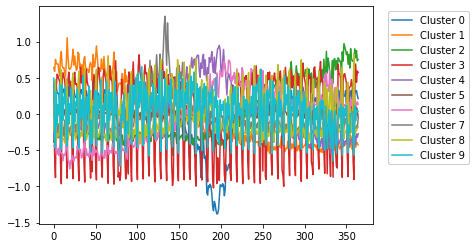

In [49]:
centers = kmeans.cluster_centers_
for i in range(len(centers)):
  plt.plot(centers[i], label='Cluster {}'.format(i));
plt.legend(bbox_to_anchor=(1.3,1), framealpha=1, frameon=True);

In [50]:
id_cluster = dict()
for index in consumption_series:
    predicted = kmeans.predict([consumption_series[index]])
    id_cluster[index] = predicted[0]
id_cluster

{0: 5,
 1: 5,
 2: 2,
 3: 8,
 4: 2,
 5: 1,
 6: 0,
 7: 8,
 8: 2,
 9: 5,
 10: 7,
 12: 5,
 13: 4,
 14: 5,
 15: 0,
 16: 4,
 17: 1,
 18: 6,
 19: 9,
 20: 7,
 21: 5,
 22: 8,
 24: 2,
 25: 5,
 27: 2,
 28: 7,
 29: 3,
 30: 2,
 31: 2,
 36: 3,
 38: 7,
 40: 4,
 41: 7,
 42: 3,
 43: 4,
 44: 5,
 45: 8,
 46: 5,
 47: 8,
 48: 6,
 49: 9,
 50: 8,
 51: 5,
 52: 9,
 53: 3,
 55: 1,
 56: 0,
 57: 1,
 58: 6,
 59: 4,
 60: 3,
 61: 0,
 63: 5,
 65: 3,
 66: 4,
 68: 8,
 69: 8,
 70: 0,
 71: 1,
 75: 9,
 77: 8,
 80: 6,
 81: 2,
 82: 4,
 83: 8,
 84: 0,
 86: 3,
 87: 5,
 88: 1,
 89: 5,
 90: 5,
 91: 8,
 92: 1,
 93: 1,
 94: 4,
 95: 4,
 96: 9,
 97: 0,
 98: 4,
 99: 9,
 100: 8,
 101: 8,
 102: 7,
 103: 5,
 104: 4,
 105: 9,
 106: 5,
 107: 5,
 108: 7,
 109: 0,
 110: 0,
 111: 1,
 114: 4,
 115: 5,
 117: 6,
 118: 0,
 119: 2,
 120: 3,
 121: 2,
 122: 3,
 123: 7,
 124: 3,
 125: 9,
 126: 5,
 127: 2,
 128: 4,
 129: 9,
 130: 7,
 131: 0,
 132: 6,
 133: 6,
 134: 3,
 137: 6,
 139: 0,
 140: 8,
 141: 6,
 142: 2,
 143: 2,
 144: 6,
 146: 8,
 147: 9,
 

Asignamos a cada id el cluster que más se la aproxima.

In [51]:
def assign_cluster_or_default(id, id_clusters):
  if id in id_clusters.keys():
    return id_clusters[id]
  else:
    return 10

water_consumption_per_id_date['cluster'] = water_consumption_per_id_date.apply(lambda row: assign_cluster_or_default(row.id, id_cluster), axis = 1)
water_consumption_per_id_date

,id,datetime,consumption,cluster
0,0,2019-02-01,243,5
1,0,2019-02-02,236,5
2,0,2019-02-03,335,5
3,0,2019-02-04,252,5
4,0,2019-02-05,220,5
...,...,...,...,...
890832,2748,2019-08-03,313,10
890833,2748,2019-09-14,8,10
890834,2749,2019-08-06,0,10
890835,2749,2019-10-11,2,10


# Búsqueda de los mejores parámetros 
Hemos creado una función gridsearch que busca los mejores parámetros SARIMA para una serie temporal. Si pasamos esta función a cada una de las series agregadas de cada cluster podemos obtener una parametrización óptima generalizada para ese cluster

In [52]:
import itertools
import statsmodels.api as sm

def sarima_grid_search(y, seasonal_period):
    p = d = q = range(0, 2)
    pdq = list(itertools.product(p, d, q))
    seasonal_pdq = [(x[0], x[1], x[2],seasonal_period) for x in list(itertools.product(p, d, q))]
    
    mini = float('+inf')
    
    
    for param in pdq:
        for param_seasonal in seasonal_pdq:
            try:
                mod = sm.tsa.statespace.SARIMAX(y,
                                                order=param,
                                                seasonal_order=param_seasonal,
                                                enforce_stationarity=False,
                                                enforce_invertibility=False)
                results = mod.fit()
                
                if results.aic < mini:
                    mini = results.aic
                    param_mini = param
                    param_seasonal_mini = param_seasonal
            except:
                continue
    return (param_mini, param_seasonal_mini, mini)

## Funciones para obtener los mejores parámetros SARIMA por cada cluster

In [53]:
def cluster_grouped_ts(dataset, cluster_id) -> pd.DataFrame:
  cluster_series = dataset[dataset['cluster'] == cluster_id]
  cluster_series.drop(['id','cluster'], axis = 1, inplace = True)
  return cluster_series.groupby('datetime').sum()

def grid_search_by_cluster(dataset, seasonal_period=30) -> dict:
  best_params_per_cluster = {}
  for cluster_id in set(dataset.cluster):
    cluster_ts = cluster_grouped_ts(dataset, cluster_id)
    best_params_cluster = sarima_grid_search(cluster_ts, seasonal_period)
    best_params_per_cluster[cluster_id] = best_params_cluster
  return best_params_per_cluster

In [54]:
params_by_cluster = grid_search_by_cluster(water_consumption_per_id_date)

In [55]:
params_by_cluster

{0: ((1, 1, 1), (1, 1, 1, 30), 6576.375828693843),
 1: ((0, 1, 0), (1, 1, 1, 30), 6882.497234209019),
 2: ((1, 1, 1), (0, 1, 1, 30), 6219.868973654588),
 3: ((1, 0, 1), (1, 1, 1, 30), 7418.590787044995),
 4: ((1, 1, 1), (0, 1, 1, 30), 7317.39466791492),
 5: ((1, 1, 1), (1, 1, 1, 30), 6282.30369645465),
 6: ((0, 1, 1), (1, 1, 1, 30), 5781.540868048478),
 7: ((0, 1, 1), (0, 1, 1, 30), 6284.603685665137),
 8: ((0, 0, 1), (1, 1, 1, 30), 6664.24465912913),
 9: ((1, 0, 1), (1, 1, 1, 30), 7869.7295558670985),
 10: ((1, 0, 1), (0, 1, 1, 30), 9336.430991505647)}

## Predección por id según cluster

In [56]:
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import statsmodels.api as sm

def max_if_negative(x, y):
  if x < 0:
    return y
  else:
    return x

def combine_predictions(prediction_mean, prediction_high):
   return [max_if_negative(x, prediction_high[ind]) for ind, x in enumerate(prediction_mean)]

def train_predict_by_id(dataset, params_per_cluster, predict_steps=14):
  column_names = ['id', 'day_1', 'day_2', 'day_3', 'day_4', 'day_5', 'day_6', 'day_7', 'week_1', 'week_2']
  df = pd.DataFrame(columns = column_names)
  ids = set(dataset['id'])
  for id in ids:
    try:
      print('id: {id} de {len}, completado: {percent:.2f}%'.format(id=id, len=len(ids), percent=(len(df)/len(ids))*100))
      current_id_time_serie = dataset[dataset['id'] == id]
      cluster = list(current_id_time_serie['cluster'])[0]
      if cluster < 10:
        best_order = params_per_cluster[cluster][0]
        best_seasonal_order = params_per_cluster[cluster][1]
        y = current_id_time_serie.consumption.values
        scaler = StandardScaler()
        y_scaled = scaler.fit_transform(np.array(y)[:, np.newaxis])
        model = sm.tsa.statespace.SARIMAX(y_scaled,
                                      order=best_order,
                                      seasonal_order=best_seasonal_order,
                                      enforce_stationarity=False,
                                      enforce_invertibility=False)
        trained_model = model.fit()
        predicted_scaled = trained_model.get_forecast(steps=predict_steps)
        pred_ci = predicted_scaled.conf_int(alpha=0.5)
        predicted_mean = scaler.inverse_transform(predicted_scaled.predicted_mean.reshape(-1, 1))
        prediced_high = scaler.inverse_transform(pred_ci[:, 1].reshape(-1, 1))
        predicted = combine_predictions(predicted_mean, prediced_high)
        week_1 = sum(predicted[:7])
        week_2 = sum(predicted[7:])
        days_week_consumptions = np.append(np.append(predicted[:7], week_1), week_2)
        to_append = np.concatenate(([id],days_week_consumptions))
      else:
        forecaster = ForecasterAutoreg(
                  regressor = GradientBoostingRegressor(random_state=123),
                  lags = 25)

        forecaster.fit(y=current_id_time_serie['consumption'])

        predictions = forecaster.predict(predict_steps)
        week_1 = sum(predictions[:7])
        week_2 = sum(predictions[7:])
        days_week_consumptions = np.append(np.append(predictions[:7], week_1), week_2)
        to_append = np.concatenate(([id],days_week_consumptions))
    except:
      to_append = [id, 0, 0, 0, 0, 0, 0, 0, 0, 0]
    df.loc[len(df)] = to_append
  return df

In [57]:
predictions_df = train_predict_by_id(water_consumption_per_id_date, params_by_cluster)

id: 0 de 2747, completado: 0.00%
id: 1 de 2747, completado: 0.04%
id: 2 de 2747, completado: 0.07%
id: 3 de 2747, completado: 0.11%
id: 4 de 2747, completado: 0.15%
id: 5 de 2747, completado: 0.18%
id: 6 de 2747, completado: 0.22%
id: 7 de 2747, completado: 0.25%
id: 8 de 2747, completado: 0.29%
id: 9 de 2747, completado: 0.33%
id: 10 de 2747, completado: 0.36%
id: 11 de 2747, completado: 0.40%
id: 12 de 2747, completado: 0.44%
id: 13 de 2747, completado: 0.47%
id: 14 de 2747, completado: 0.51%
id: 15 de 2747, completado: 0.55%
id: 16 de 2747, completado: 0.58%
id: 17 de 2747, completado: 0.62%
id: 18 de 2747, completado: 0.66%
id: 19 de 2747, completado: 0.69%
id: 20 de 2747, completado: 0.73%
id: 21 de 2747, completado: 0.76%
id: 22 de 2747, completado: 0.80%
id: 23 de 2747, completado: 0.84%
id: 24 de 2747, completado: 0.87%
id: 25 de 2747, completado: 0.91%
id: 26 de 2747, completado: 0.95%
id: 27 de 2747, completado: 0.98%
id: 28 de 2747, completado: 1.02%
id: 29 de 2747, completa

In [58]:
predictions_df.head(20)

,id,day_1,day_2,day_3,day_4,day_5,day_6,day_7,week_1,week_2
0,0.0,322.643897,279.884309,334.804124,403.889071,330.053999,301.720627,331.387083,2304.383111,2125.041222
1,1.0,1.226936,0.319819,24.313161,21.985792,3.366263,25.494132,0.963284,77.669386,105.038729
2,2.0,43.007626,42.739657,38.109883,38.375273,37.354885,39.216061,36.828245,275.631631,277.157373
3,3.0,428.543610,431.767659,425.863796,447.004701,440.305512,447.972671,441.084200,3062.542147,3138.465990
4,4.0,324.129600,318.474081,312.849158,311.426601,309.176878,313.676865,300.510199,2190.243380,2053.404724
5,5.0,77.285555,6.479734,15.433548,20.381709,16.965122,33.229835,141.965081,311.740583,627.158344
6,6.0,200.979901,189.431728,157.843858,205.673692,176.275373,185.616182,193.624141,1309.444876,1297.786277
7,7.0,213.745447,367.571646,139.266244,160.896517,137.593786,154.360262,82.902560,1256.336462,1090.771684
8,8.0,178.063823,260.769511,216.502941,237.355466,225.131816,239.392013,229.735525,1586.951095,1625.575969
9,9.0,88.091853,165.129587,82.144218,114.046548,165.161957,95.782032,123.381459,833.737655,1474.979052


## Formateo salida

In [59]:
predictions_df.id = predictions_df.id.astype(int)
predictions_df[predictions_df < 0] = 0
predictions_df = predictions_df.sort_values(['id'])
rounded_predictions = predictions_df.round(2)

print(len(predictions_df))
rounded_predictions.to_csv('~/MBIGDVIU_UH2022.txt', sep="|", index=False, header=False)

2747
